### Notebook Content:
1. [Description of the project](#description)
2. [Import libraries](#import)
3. [Supplementary functions](#functions)
4. [Load data & preview](#dataload)
5. [Data exploration](#exploration)
6. [Feature analysis](#features)
7. [Correlation analysis](#correlation)
8. [Conclusion](#conclusion)
***

## Description of the project<a class="anchor" id="description"></a>

This project is one the numerous projects of UNICEF whose primary mission as an international division of UNO is precisely in advancing the well-being of the world's children.

**The goal of this project** is to track the impact of the living standards of these students aged 15 to 22 on their math grade in order to identify at an early stage at-risk students.

This can be done using a ML model that would predict the results of the maths state exam for each student in the school. In this notebook, I'm planning to do a preliminary EDA, draw conclusions and summarize them in the report.

* * *

Данный проект является одним из проектов UNICEF - международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.

**Цель проекта** - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Но для начала необходимо провести подготовительный разведывательный анализ данных, сделать выводы и составить отчёт по их результатам. 

## Import libraries<a class="anchor" id="import"></a>

In [463]:
import numpy as np
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn import preprocessing

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools

import cufflinks as cf
cf.go_offline()

layout = cf.Layout(
    height=400,
    width=800
)

## Supplementary functions<a class="anchor" id="functions"></a>

In [464]:
def convert_to_categ(df, columns):
    """
    Convert all specified columns of the dataframe to the categorical type.
    """
    df_copied = df.copy()
    for column in columns:
        df_copied[column] = df_copied[column].astype('category')
    return df_copied


def convert_to_label(df, columns):
    """
    Convert all specified columns of the dataframe to the columns with labels using LabelEncoder from sklearn.
    """
    df_copied = df.copy()
    for column in columns:
        le = preprocessing.LabelEncoder()
        # fit only unique str values of desired column
        le.fit([val for val in df_copied[column].unique() if type(val) == str])
        # transform the values of the desired column leaving np.NaN as they are
        df_copied[column] = df_copied[column].apply(lambda x: le.transform([x])[0] if type(x) == str else x)
    return df_copied


def replace_nan(df):
    """
    Replace the missing values by the median (for numerical columns) and by the first mode (for categorical columns).
    """
    df_copied = df.copy()
    for col in df_copied.columns:
        if df_copied[col].dtype == float:
            df_copied[col] = df_copied[col].fillna(df[col].median())
        elif df_copied[col].dtype == object:
            df_copied[col] = df_copied[col].fillna(df[col].mode()[0])
        elif df_copied[col].dtype.name == 'category':
            df_copied[col] = df_copied[col].fillna(df[col].mode()[0])
    return df_copied
    
    
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
        <= 0.05/len(combinations_all): # took into account the Bonferroni correction
            print(f'Found the statistical difference for the "{column}" column.')
            break

## Load data & preview <a class="anchor" id="dataload"></a>

In [465]:
data = pd.read_csv('data/stud_math.xls', sep=',')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

## Data exploration <a class="anchor" id="exploration"></a>

#### How to reorganize the dataset:
1. change the type of the columns to categorical that will save the memory and will allow us to work more convenient with the data:
> 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel', 'freetime', 'goout', 'health'  
2. change the object type columns with 'yes' and 'no' values to int type: 'yes' = 1, 'no' = 0
> 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'

In [467]:
# 1.
columns_to_cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', \
                  'guardian']
data = convert_to_categ(data, columns_to_cat)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [468]:
columns_to_label = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
data = convert_to_label(data, columns_to_label)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null category
sex                    395 non-null category
age                    395 non-null int64
address                378 non-null category
famsize                368 non-null category
Pstatus                350 non-null category
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null category
Fjob                   359 non-null category
reason                 378 non-null category
guardian               364 non-null category
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null float64
famsup                 356 non-null float64
paid                   355 non-null float64
activities             381 non-null float64
nursery                379 non-null float64
studytim

## Feature analysis <a class="anchor" id="features"></a>

GOAL: investigate the distribution of the numerical features and remove outliers and evaluate the unique values for categorical features. 

### numerical values

In [470]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,386.000000,356.000000,355.000000,381.000000,...,388.000000,375.000000,361.000000,364.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,0.132124,0.615169,0.436620,0.511811,...,-6.115979,0.949333,0.844875,0.340659,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.339065,0.487240,0.496667,0.500518,...,2.526235,0.219609,0.362526,0.474583,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,-6.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,-3.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,-3.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### - age

In [471]:
data.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [472]:
data.age.iplot(kind='hist', title='Age distribution for the students', layout=layout.to_plotly_json())

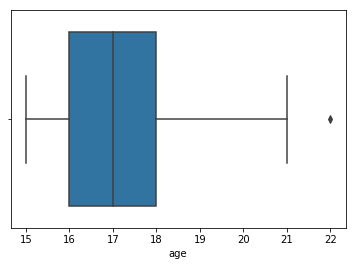

In [473]:
sns.boxplot(data=data, x='age');

In [474]:
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
perc25 = data.age.quantile(0.25)
perc75 = data.age.quantile(0.75)
perc25 - 1.5*IQR, perc75 + 1.5*IQR

(13.0, 21.0)

The distribution of the 'age' feature is right-skewed and on the boxplot we can see one outlier with the value '22' that was also confirmed using the IQR formula. But the value '22' is still in the range of the possible age that was mentioned in the project description. Therefore, not to remove '22' age seems like a common sense.

* * *

Распределение возраста скошено вправо и на боксплоте мы видим выброс со значением "22", что также подтверждается формулой интерквартильного расстояния. Но т.к. значение "22" входит в известные изначально потенциальные характеристики распределения возраста, то стоит в этом случае воспользоваться здравым смыслом и не удалять это значение.

### - Medu

In [475]:
data.Medu.iplot(kind='hist', title="Mother's education distribution", layout=layout.to_plotly_json())

### - Fedu

In [476]:
data.Fedu.iplot(kind='hist', title="Father's education distribution", layout=layout.to_plotly_json())

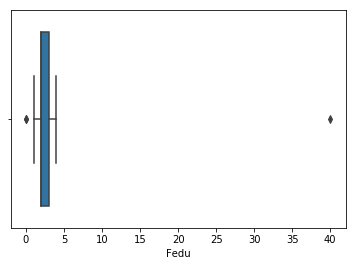

In [477]:
sns.boxplot(data=data, x='Fedu');

Here we can see an obvious outlier that lies beyond the possible value range - value '40'. This value we need to  drop.

***

Здесь мы видим очевидный выброс, который лежит за пределами возможного распределения признака, поэтому мы удаляем строку с выбросом.

In [478]:
print(data.shape)
data = data.loc[data.Fedu != 40]
data.shape

(395, 30)


(394, 30)

### - traveltime

In [479]:
data.traveltime.iplot(kind='hist', title="Travel time distribution", layout=layout.to_plotly_json())

### - studytime

In [480]:
data.studytime.iplot(kind='hist', title="Study time distribution", layout=layout.to_plotly_json())

### - failures

In [481]:
data.failures.iplot(kind='hist', title="Failures distribution", layout=layout.to_plotly_json())

In the features like "traveltime", "studytime" and "failures" we don't see any outliers.
***
У таких признаков, как "traveltime", "studytime" and "failures" мы не наблюдаем выбросов.

### - famrel

In [482]:
data.famrel.iplot(kind='hist', title="Family relationship distribution", layout=layout.to_plotly_json())

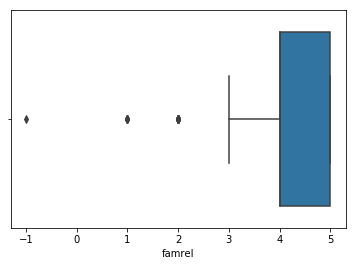

In [483]:
sns.boxplot(data=data, x='famrel');

For this feature using again a common sense we'll drop only obvious outlier which value is equal to '-1' and lies beyoud the specified in the description range from 1 to 5.
***
Для этого признака используя опять здравый смысл, мы удаляем только очевидный выброс, значение которого равно "-1" и лежит за пределами потенциальных характеристик распределения.

In [484]:
print(data.shape)
data = data.loc[data.famrel != -1]
data.shape

(394, 30)


(393, 30)

### - freetime

In [485]:
data.freetime.iplot(kind='hist', title="Freetime distribution", layout=layout.to_plotly_json())

### - goout

In [486]:
data.goout.iplot(kind='hist', title="Go out's with friends distribution", layout=layout.to_plotly_json())

### - health

In [487]:
data.health.iplot(kind='hist', title="Health distribution", layout=layout.to_plotly_json())

In the features like "freetime", "goout" and "health" we don't see any outliers.
***
У таких признаков, как "freetime", "goout" and "health" мы не наблюдаем выбросов.

### - absences

In [488]:
data.absences.iplot(kind='hist', title="Absences distribution", layout=layout.to_plotly_json())

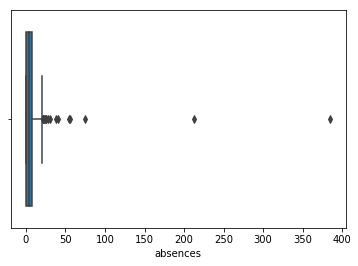

In [489]:
sns.boxplot(data=data, x='absences');

Here we can see a lot of outliers on the histogram and on the boxplot. To decide which values should be dropped we're planning to use the IQR formula.
***
Здесь мы наблюдаем много выбросов, как на гистограмме, так и на боксплоте, поэтому чтобы удалить выбросы в этом случае стоит снова воспользоваться формулой интерквартильного расстояния.

In [490]:
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
perc25 = data.absences.quantile(0.25)
print(data.shape)
data = data[~(data.absences > perc75 + 1.5*IQR)]
print(data.shape)

(393, 30)
(376, 30)


### labeled values

### schoolsup

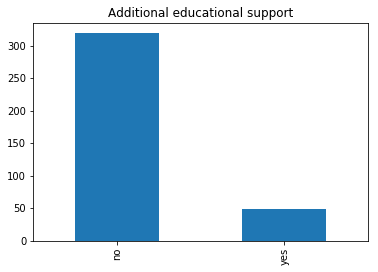

In [491]:
data.schoolsup.value_counts().sort_index().plot(kind='bar')
plt.title('Additional educational support')
plt.xticks(np.arange(2), ['no', 'yes']);

### famsup

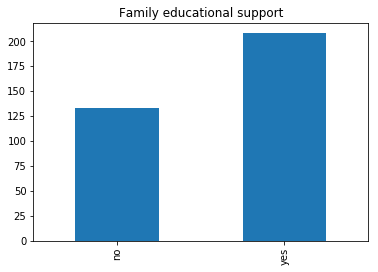

In [492]:
data.famsup.value_counts().sort_index().plot(kind='bar')
plt.title('Family educational support')
plt.xticks(np.arange(2), ['no', 'yes']);

### paid

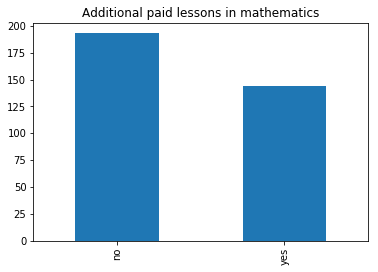

In [493]:
data.paid.value_counts().sort_index().plot(kind='bar')
plt.title('Additional paid lessons in mathematics')
plt.xticks(np.arange(2), ['no', 'yes']);

### activities

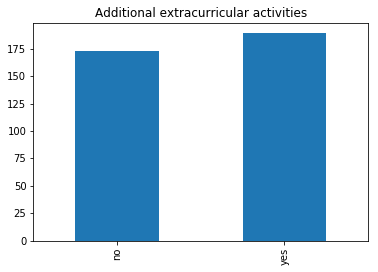

In [494]:
data.activities.value_counts().sort_index().plot(kind='bar')
plt.title('Additional extracurricular activities')
plt.xticks(np.arange(2), ['no', 'yes']);

### nursery

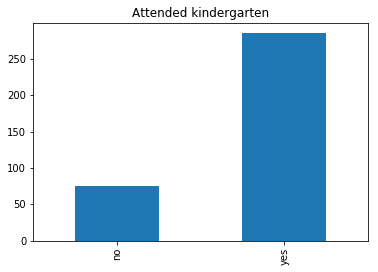

In [495]:
data.nursery.value_counts().sort_index().plot(kind='bar')
plt.title('Attended kindergarten')
plt.xticks(np.arange(2), ['no', 'yes']);

### higher

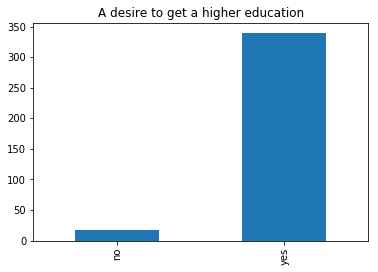

In [496]:
data.higher.value_counts().sort_index().plot(kind='bar')
plt.title('A desire to get a higher education')
plt.xticks(np.arange(2), ['no', 'yes']);

### internet

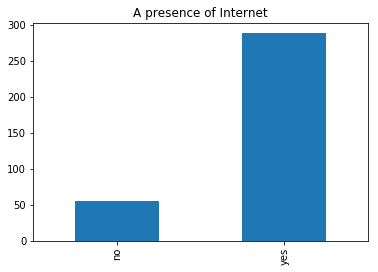

In [497]:
data.internet.value_counts().sort_index().plot(kind='bar')
plt.title('A presence of Internet')
plt.xticks(np.arange(2), ['no', 'yes']);

### romantic

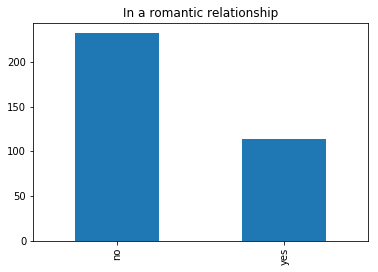

In [498]:
data.romantic.value_counts().sort_index().plot(kind='bar')
plt.title('In a romantic relationship')
plt.xticks(np.arange(2), ['no', 'yes']);

## categorical features
### school

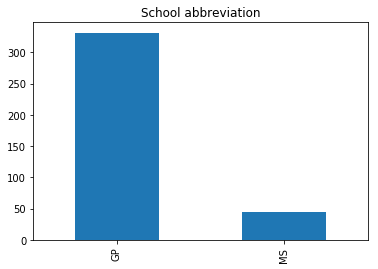

In [499]:
data.school.value_counts().plot(kind='bar')
plt.title('School abbreviation');

### sex

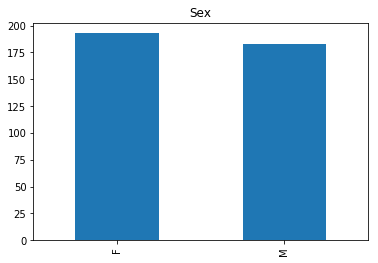

In [500]:
data.sex.value_counts().plot(kind='bar')
plt.title('Sex');

### address

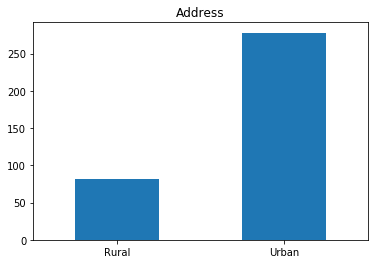

In [501]:
data.address.value_counts().sort_index().plot(kind='bar')
plt.title('Address')
plt.xticks(np.arange(2), ['Rural', 'Urban'], rotation=0);

### famsize

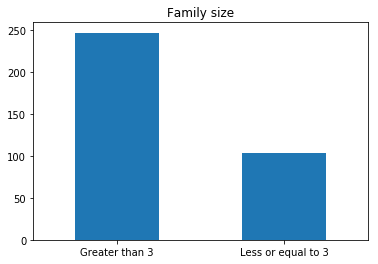

In [502]:
data.famsize.value_counts().sort_index().plot(kind='bar')
plt.title('Family size')
plt.xticks(np.arange(2), ['Greater than 3', 'Less or equal to 3'], rotation=0);

### Pstatus

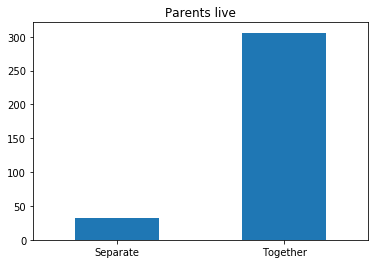

In [503]:
data.Pstatus.value_counts().sort_index().plot(kind='bar')
plt.title('Parents live')
plt.xticks(np.arange(2), ['Separate', 'Together'], rotation=0);

### Mjob

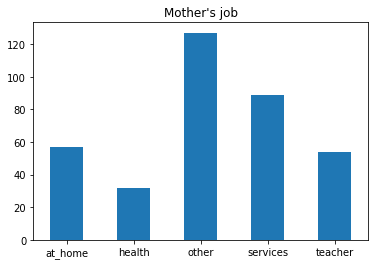

In [504]:
data.Mjob.value_counts(sort=False).plot(kind='bar')
plt.title("Mother's job")
plt.xticks(rotation=0);

### Fjob

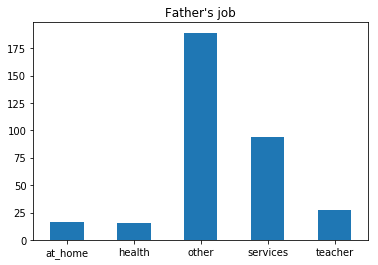

In [505]:
data.Fjob.value_counts(sort=False).plot(kind='bar')
plt.title("Father's job")
plt.xticks(rotation=0);

### reason

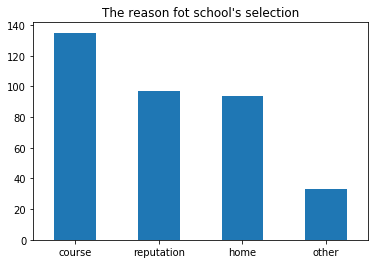

In [506]:
data.reason.value_counts().plot(kind='bar')
plt.title("The reason fot school's selection")
plt.xticks(rotation=0);

### guardian

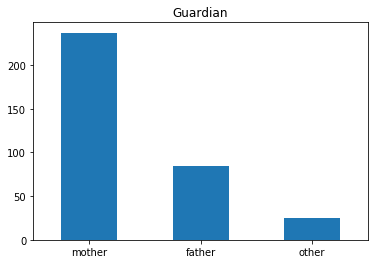

In [507]:
data.guardian.value_counts().plot(kind='bar')
plt.title("Guardian")
plt.xticks(rotation=0);

Now it's time to  deal with the missing values. 
***
Сейчас осталось заполнить пустые значения.

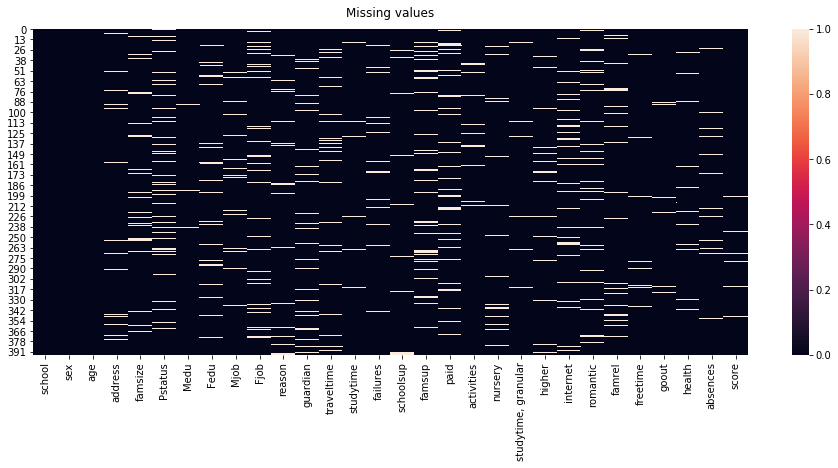

In [508]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.isnull())
heatmap.set_title('Missing values', fontdict={'fontsize':12}, pad=12);

In [509]:
round((len(data) - data.count()) * 100 / len(data), 2)

school                  0.00
sex                     0.00
age                     0.00
address                 4.52
famsize                 6.65
Pstatus                10.11
Medu                    0.80
Fedu                    6.12
Mjob                    4.52
Fjob                    9.31
reason                  4.52
guardian                7.98
traveltime              7.45
studytime               1.86
failures                5.05
schoolsup               2.39
famsup                  9.31
paid                   10.37
activities              3.72
nursery                 4.26
studytime, granular     1.86
higher                  5.05
internet                8.78
romantic                7.98
famrel                  6.91
freetime                2.39
goout                   2.13
health                  3.99
absences                3.19
score                   1.60
dtype: float64

On the heatmap we see the missing value in the whole dataset and after that we calculated the percentage of missing data per each column. In a conclusion we can tell that the percentage of missing values doesn't exceed ~10%, therefore instead of dropping the values, we'll try to replace them with a median for the numetical columns and a mode for the categorical columns. The decision not to drop the rows with missing values was also confirmed by the relatively small size of the dataset.
***
На тепловой карте отображены пропущенные значения всех столбцов нашего датасета, а также посчитан процент пропущенных значений для каждого столбца отдельно. Здесь мы видим, что число пропущенных значений не превышает ~10%. В этом случае мы приходим к выводу замены пропущенных значений на медиану для числовых значений и моду для номинативных значений, а не к полному удалению этих значений. На это решение также влияет небольшой размер датасета.

In [510]:
data = replace_nan(data)

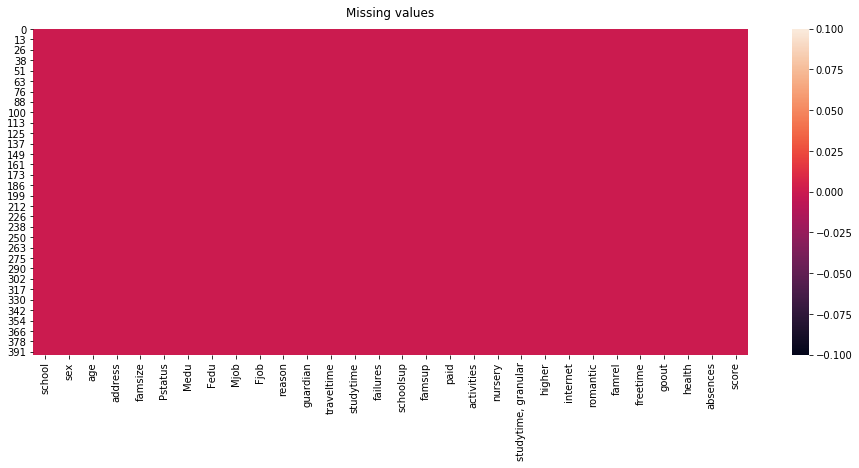

In [511]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.isnull())
heatmap.set_title('Missing values', fontdict={'fontsize':12}, pad=12);

## Correlation analysis <a class="anchor" id="correlation"></a>

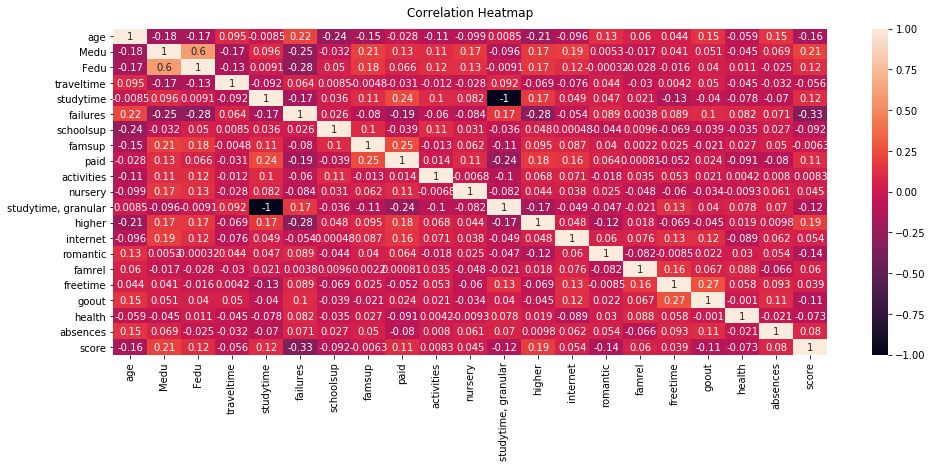

In [512]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Here we could see that two features like 'studytime' and 'studytime, granular' are completely correlated. Therefore, it makes sense to delete one of them for further analysis.
***
Глядя на матрицу корреляций, можно заметить, что только два признака скоррелированы полностью - это 'studytime' и 'studytime, granular', поэтому имеет смысл удалить один из признаков для последующего анализа. Все остальные признаки не демонстрируют высокую позитивную или негативную корреляцию, поэтому мы оставляем их в датасете.

In [513]:
print(data.shape)
data.drop(labels='studytime, granular', axis=1, inplace=True)
print(data.shape)

(376, 30)
(376, 29)


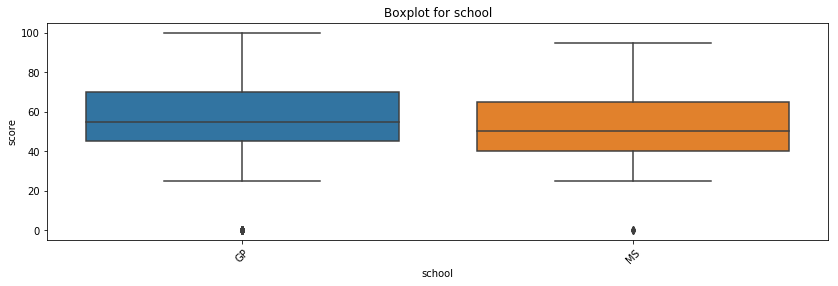

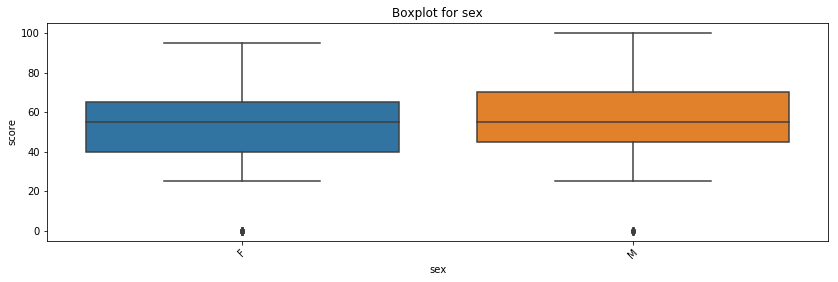

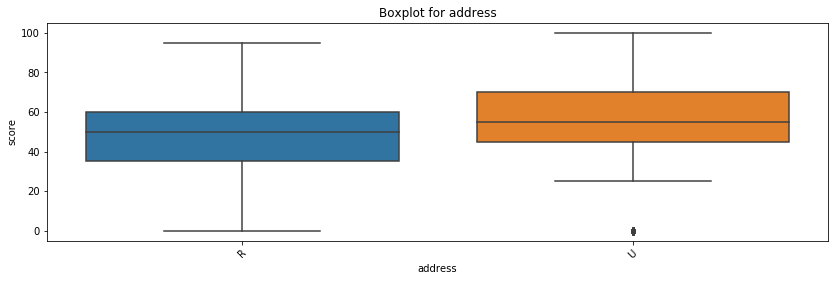

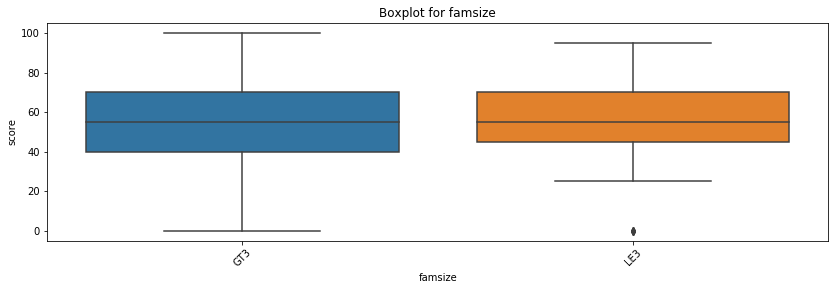

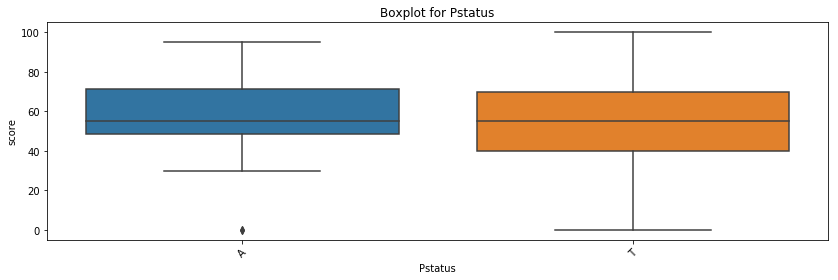

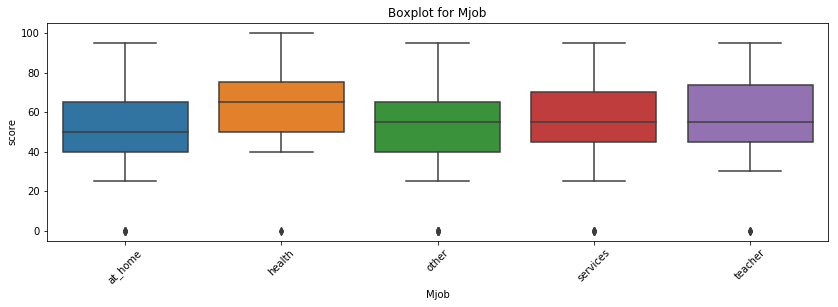

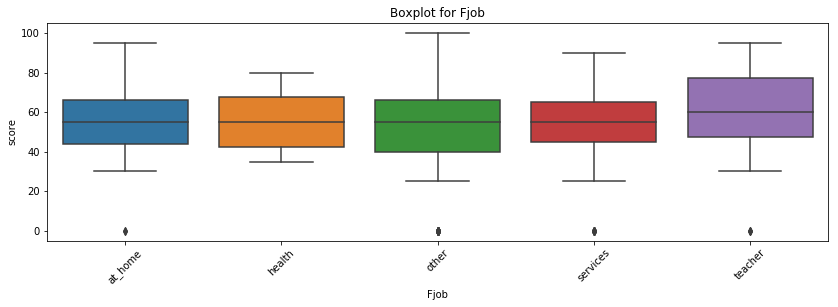

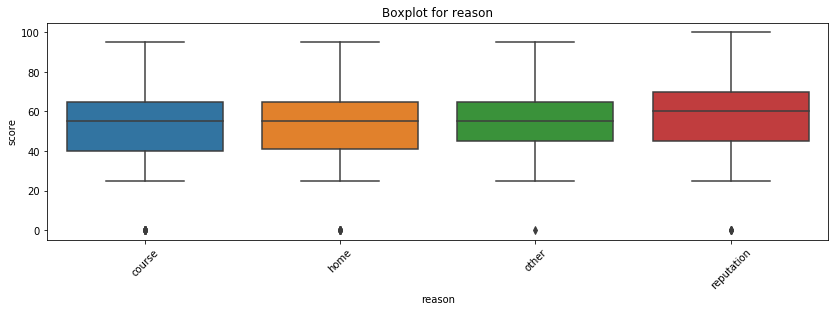

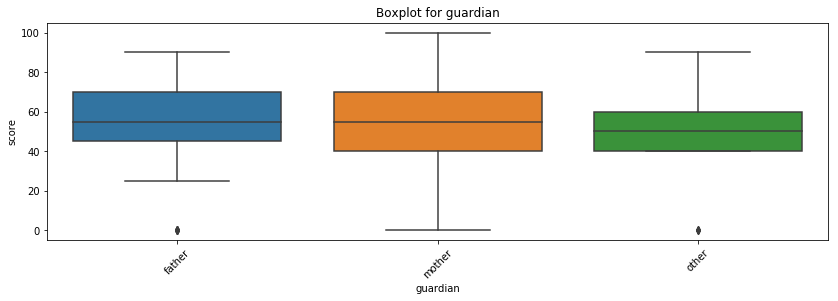

In [514]:
for col in columns_to_cat:
    get_boxplot(col)

In [515]:
for col in columns_to_cat:
    get_stat_dif(col)

Found the statistical difference for the "sex" column.
Found the statistical difference for the "address" column.
Found the statistical difference for the "Mjob" column.


Looking at the boxplots and obtained statistical results after t-test, we can confirm that data of "sex", "address" and "Mjob" categorical columns have a significant statistical difference. Therefore, for further analysis we will leave these columns and drop other categorical columns.
*** 
Используя данные графиков и результаты тестов Стьюдента для всех номинативных переменных, мы видим, что несколько признаков, а именно "sex", "address" и "Mjob", могут влиять на результат экзамена. Оставим эти номинативные переменные в датасете для дальнейшего построения модели.

In [516]:
columns_to_drop = [each for each in columns_to_cat if each not in ['Mjob', 'sex', 'address']]
columns_to_drop

['school', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian']

In [517]:
data.drop(labels=columns_to_drop, axis=1, inplace=True)
data.shape

(376, 23)

### Conclusion: <a class="anchor" id="conclusion"></a>

- Our dataset had a small amount of missing values (less than 10% for all columns) that were successfully replaced by median for the numeric columns and by mode for the categorical columns.
- The outliers were found only for 3 columns, such as 'Fedu', 'famrel' and 'absences', and were deleted that tells us about the high quality of our data.
- Only two highly correlated numerical features were found in the dataset. As a result one of them was deleted. For the categorical columns statistically was confirmed the significance of three columns that were left in the dataset.

Our dataset is clean and ready for the building of the ML model. 
*** 
- В нашем датасете было небольшое количество пропущенных значений (менее 10% для всех столбцов), которые были успешно заменены на медиану для числовых столбцов и моду для номинативных.
- Выбросы были найдены только в 3 столбцах, таких как 'Fedu', 'famrel' и 'absences', и удалены, что говорит нам о достаточно высоком качестве данных.
- Только два высоко скоррелированных столбца были обнаружены в датасете, один из которых был в последствии удален. Среди номинативных признаков статистически значимыми было обнаружено три признака, которые оставлены в датасете.

В итоге, наш датасет чист и готов для построения модели искусственного обучения.